In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/قيم/Datasets after updated/Car detection.v1i.yolov8.zip'

Archive:  /content/drive/MyDrive/قيم/Datasets after updated/Car detection.v1i.yolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/10064_jpg.rf.7d7e77982f2d1cae8badd980efc00089.jpg  
 extracting: test/images/10186_jpg.rf.fd523fa15f5aad3dda9b8aff84ead3a6.jpg  
 extracting: test/images/10336_jpg.rf.62dd93c5fc1ede6db4561b0d5d17b978.jpg  
 extracting: test/images/10668_jpg.rf.94e977abd6a1dda97f735829d23673c1.jpg  
 extracting: test/images/10869_jpg.rf.6aed1b739995738223571f2c9d73cdad.jpg  
 extracting: test/images/11006_jpg.rf.c7cb4354f2a7d68bd6499b3f0529ba15.jpg  
 extracting: test/images/1116_jpg.rf.6f989ec2e7d2e011585c6e36b93f35ea.jpg  
 extracting: test/images/11317_jpg.rf.449f2f473fd5972bd17fdf272b520eb6.jpg  
 extracting: test/images/11317_jpg.rf.91d88dd9e69f3a75da4c19ed163417fd.jpg  
 extracting: test/images/1143_jpg.rf.81e7479f3cf9aa854491985

###CNN - Accident Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/قيم/Datasets after updated/Accident_Detection.v2i.yolov8.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/labels/severityV4_44_jpg.rf.f08eb9393753b0b7f11bc52b4d5acd09.txt  
  inflating: train/labels/severityV4_44_jpg.rf.fae547aae18175d23ef3cceb701f5e95.txt  
 extracting: train/labels/severityV4_45_jpg.rf.aedbc1342915b91437fbef8afbfa305c.txt  
 extracting: train/labels/severityV4_45_jpg.rf.af1be3b8608c415a6a535c0688ade53c.txt  
 extracting: train/labels/severityV4_45_jpg.rf.fca67269991d84276fcf48988f56b7ad.txt  
  inflating: train/labels/severityV4_46_jpg.rf.028deb717073f219b358fcb24e546a2f.txt  
  inflating: train/labels/severityV4_46_jpg.rf.0de9e72cebaac121d4ceae962c755f2d.txt  
  inflating: train/labels/severityV4_46_jpg.rf.1598a75816b6f9025c8af10ff4cb0a11.txt  
  inflating: train/labels/severityV4_46_jpg.rf.25511e96b6e454af39adc8c77de353f5.txt  
  inflating: train/labels/severityV4_46_jpg.rf.27cabde3b637565ad09f212f2fd6d7ce.txt  
  inflating: train/labels/severityV4_46_jpg.rf.4cf70d0471accb1159feeb90d74e6c87.txt  
  i

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import yaml
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load YAML configuration
yaml_file = '/content/data.yaml'  # Replace with the actual path to your data.yaml file

with open(yaml_file, 'r') as file:
    data = yaml.safe_load(file)

In [ ]:
# prompt: # Extract information from the YAML file

num_classes = len(data['names'])
train_path = data['train']
val_path = data['val']

print(f"Number of classes: {num_classes}")
print(f"Training path: {train_path}")
print(f"Validation path: {val_path}")


Number of classes: 1
Training path: ../train/images
Validation path: ../valid/images


In [ ]:
# # Extract information from the YAML file
# train_path = data.get('../train/images')  # Path to training data
# val_path = data.get('../valid/images')      # Path to validation data
# nc = data.get('nc')             # Number of classes
# names = data.get('names')       # Class names

# print(f"Training data path: {train_path}")
# print(f"Validation data path: {val_path}")
# print(f"Number of classes: {nc}")
# print(f"Class names: {names}")

In [ ]:
# Step 2: Preprocessing the dataset using ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0/255,            # Normalize pixel values to [0, 1]
    rotation_range=20,          # Randomly rotate images by 20 degrees
    width_shift_range=0.2,      # Horizontally shift images
    height_shift_range=0.2,     # Vertically shift images
    shear_range=0.2,            # Shear transformations
    zoom_range=0.2,             # Zoom transformations
    horizontal_flip=True,       # Randomly flip images horizontally
    validation_split=0.2        # Use 20% of data for validation
)

In [ ]:
# prompt: # Load the training data from the directory defined in the YAML

train_generator = datagen.flow_from_directory(
    '/content/train',  # Replace with your training data directory from the YAML
    target_size=(224, 224),  # Resize images to a suitable size for your model
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 9497 images belonging to 2 classes.


In [ ]:
# # prompt: Found 0 images belonging to 0 classes why?

# !ls /content/train/images

In [ ]:
# prompt: # Load the validation data

validation_generator = datagen.flow_from_directory(
    '/content/valid',  # Replace with your training data directory from the YAML
    target_size=(224, 224),  # Resize images to a suitable size for your model
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 228 images belonging to 2 classes.


In [ ]:
# !ls /content/train/images

In [ ]:
# # Load the training data from the directory defined in the YAML
# train_generator = datagen.flow_from_directory(
#     train_path,
#     target_size=(150, 150),     # Resize images to 150x150 pixels
#     batch_size=32,
#     class_mode='binary',        # Binary classification (accident or non-accident)
# )

# # Load the validation data
# validation_generator = datagen.flow_from_directory(
#     val_path,
#     target_size=(150, 150),
#     batch_size=32,
#     class_mode='binary'
# )

In [ ]:
# import os
# if os.path.exists(train_path):
#     print(f"Directory '{train_path}' exists.")
# else:
#     print(f"Directory '{train_path}' does not exist!")

In [ ]:
# # Step 3: Build the CNN Model
# model = Sequential()

# # First Convolutional Layer
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Second Convolutional Layer
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Third Convolutional Layer
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Flatten the layers to make the data ready for dense layers
# model.add(Flatten())

# # Fully Connected Dense Layer
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))  # Dropout to prevent overfitting

# # Output Layer (for binary classification)
# model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# # Step 3: Build the CNN Model
# model = Sequential()

# # First Convolutional Layer
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) #Changed input shape to (224, 224, 3)
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Second Convolutional Layer
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Third Convolutional Layer
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Flatten the layers to make the data ready for dense layers
# model.add(Flatten())

# # Fully Connected Dense Layer
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))  # Dropout to prevent overfitting

# # Output Layer (for binary classification)
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
# # Step 4: Compile the Model
# model.compile(
#     loss='binary_crossentropy',  # Use binary crossentropy for binary classification
#     optimizer='adam',            # Adam optimizer
#     metrics=['accuracy']         # Track accuracy during training
# )

In [ ]:
# # Step 5: Train the Model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // validation_generator.batch_size,
#     epochs=10  # You can increase the number of epochs for better results
# )

# # Step 6: Evaluate the Model Performance
# # Extract the accuracy and loss data
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

In [ ]:
# Step 3: Build the CNN Model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) #Changed input shape to (224, 224, 3)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers to make the data ready for dense layers
model.add(Flatten())

# Fully Connected Dense Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output Layer (for multi-class classification with 2 classes)
model.add(Dense(2, activation='softmax')) # Changed to 2 outputs with softmax

# Step 4: Compile the Model
model.compile(
    loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class
    optimizer='adam',            # Adam optimizer
    metrics=['accuracy']         # Track accuracy during training
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 5: Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5  # You can increase the number of epochs for better results
)

# Step 6: Evaluate the Model Performance
# Extract the accuracy and loss data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


296/296 ━━━━━━━━━━━━━━━━━━━━ 167s 523ms/step - accuracy: 0.9974 - loss: 0.0138 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
  1/296 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 1.0000 - loss: 0.0000e+00

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 181s 484ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 138s 459ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


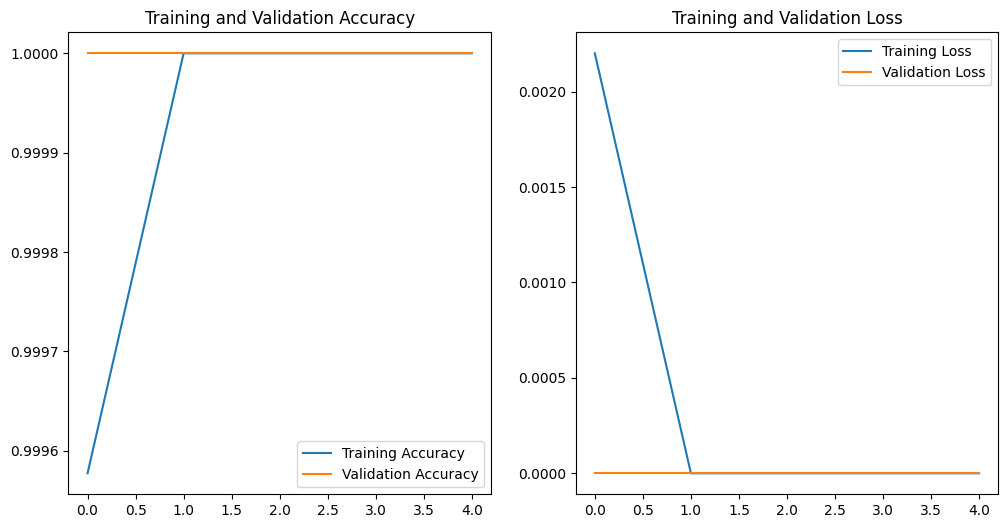

In [ ]:
# Plot Training and Validation Accuracy
epochs_range = range(5)

plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
# # prompt: # prompt: predict ONE PIC
# # from tensorflow.keras.preprocessing import image
# # import numpy as np
# # def predict_image(image_path, model):
# #   img = image.load_img(image_path, target_size=(224, 224))
# #   img_array = image.img_to_array(img)
# #   img_array = np.expand_dims(img_array, axis=0)
# #   img_array /= 255.0  # Normalize the image
# #   prediction = model.predict(img_array)
# #   # Assuming 1 CLASSES

# predicted_class = np.argmax(prediction)
#   return predicted_class

# # Path to the image you want to predict
# image_path = '/content/Accident1.jpeg'

# # Predict the class of the image
# predicted_class = predict_image(image_path, model)

# # Assuming you have a class map (e.g., {0: 'Accident', 1: 'No Accident'})
# class_map = {0: 'Accident', 1: 'No Accident'}

# print(f"The predicted class is: {class_map.get(predicted_class, 'Unknown')}")


In [ ]:
# # Step 1: Specify the path to the new image
# image_path = '/content/AutoAccident24-1.jpg'  # Change this to the actual path of your image

# # Step 2: Run inference on the image
# results = model.predict(source=image_path, save=True)

# # Step 3: Class mapping (change based on your dataset labels)
# label_map = {0: 'Accident' }  # Modify based on your dataset classes

# # Step 4: Display prediction results
# for result in results:
#     for pred_class in result.boxes.cls:
#         print(label_map[int(pred_class)])  # This will print 'Accident' or 'No Accident'

# # # Step 5: Visualize the result image
# # from PIL import Image
# # Image.open(f'runs/detect/predict/{image_path.split("/")[-1]}').show()  # Shows the prediction result image


In [ ]:
# Step 1: Specify the path to the new image
image_path = '/content/PHOTO-2024-09-11-18-21-05.jpg'  # Change this to the actual path of your image

# Step 2: Load and preprocess the image
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(image_path, target_size=(224, 224))  # Load image and resize to match model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

# Step 3: Run inference on the image
prediction = model.predict(img_array) # Pass the preprocessed image data to the predict function

# Step 4: Interpret the prediction
predicted_class = np.argmax(prediction)

# Step 5: Class mapping (change based on your dataset labels)
label_map = {0: 'Accident'}  # Modify based on your dataset classes

# Step 6: Display prediction results
print(f"The predicted class is: {label_map.get(predicted_class, 'Unknown')}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
The predicted class is: Accident


In [ ]:
# prompt: predict ONE PIC
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(image_path, model):
  img = image.load_img(image_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0  # Normalize the image
  prediction = model.predict(img_array)
  # Assuming 2 classes
  predicted_class = np.argmax(prediction)
  return predicted_class #Fixed indentation

# Path to the image you want to predict
image_path = '/content/PHOTO-2024-09-11-18-21-05.jpg'

# Predict the class of the image
predicted_class = predict_image(image_path, model)

# Assuming you have a class map (e.g., {0: 'Accident', 1: 'No Accident'})
class_map = {0: 'Accident'}

print(f"The predicted class is: {class_map.get(predicted_class, 'Unknown')}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted class is: Accident


In [ ]:
# # prompt: predict ONE PIC

# from tensorflow.keras.preprocessing import image
# import numpy as np

# def predict_image(image_path, model):
#   img = image.load_img(image_path, target_size=(224, 224))
#   img_array = image.img_to_array(img)
#   img_array = np.expand_dims(img_array, axis=0)
#   img_array /= 255.0  # Normalize the image

#   prediction = model.predict(img_array)

#   # Assuming you have 2 classes (accident and non-accident)
#       prediction[0]
#     print("Prediction: Accident")

# # Example usage:
# image_path_to_predict = '/content/PHOTO-2024-09-11-18-21-05.jpg'  # Replace with the path to your image
# predict_image(image_path_to_predict, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: Accident


In [ ]:
# Step 7: Save the trained model
model.save('accident_detection_cnn.h5')

# Load the saved model later using:
# model = tf.keras.models.load_model('accident_detection_cnn.h5')